In [2]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [3]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the third hidden layer
classifier.add(Dense(units= 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set

# list all data in history

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

print(model_history.history.keys())
# summarize history for accuracy

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6003 - accuracy: 0.7712 - val_loss: 0.4971 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5143 - accuracy: 0.7910 - val_loss: 0.4718 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4970 - accuracy: 0.7964 - val_loss: 0.4671 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4796 - accuracy: 0.7979 - val_loss: 0.4562 - val_accuracy: 0.7959
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.7979 - val_loss: 0.4600 - val_accuracy: 0.8016
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4639 - accuracy: 0.8011 - val_loss: 0.4477 - val_accuracy: 0.8027
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4560 - accuracy: 0.8029 - val_loss: 0.4452 - val_accuracy: 0.8031

536/536 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8425 - val_loss: 0.3832 - val_accuracy: 0.8444
Epoch 57/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8423 - val_loss: 0.3825 - val_accuracy: 0.8425
Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8386 - val_loss: 0.3818 - val_accuracy: 0.8326
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8371 - val_loss: 0.3799 - val_accuracy: 0.8379
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3767 - accuracy: 0.8416 - val_loss: 0.3918 - val_accuracy: 0.8474
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3780 - accuracy: 0.8418 - val_loss: 0.3860 - val_accuracy: 0.8451
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8457 - val_loss: 0.3888 - val_accuracy: 0.8383
Epoch

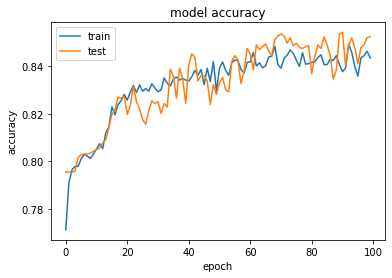

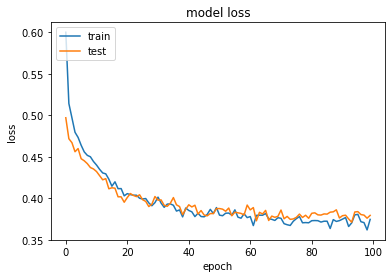

In [4]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [5]:


# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)


0.8575
